In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns 
sns.set()

E:\Anaconada\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
raw_data = pd.read_csv(r"E:\Data Science Material udemy\data of coding\2.01.+Admittance.csv")

In [3]:
raw_data.head()

SAT Admitted
0  1363       No
1  1792      Yes
2  1954      Yes
3  1653       No
4  1593       No

In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data

SAT  Admitted
0    1363         0
1    1792         1
2    1954         1
3    1653         0
4    1593         0
..    ...       ...
163  1722         1
164  1750         1
165  1555         0
166  1524         0
167  1461         0

[168 rows x 2 columns]

In [5]:
y = data['Admitted']
x1 = data['SAT']

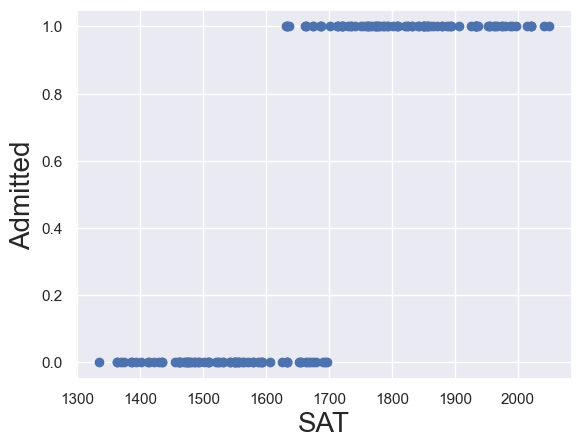

In [7]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

### Plot with a regression line 

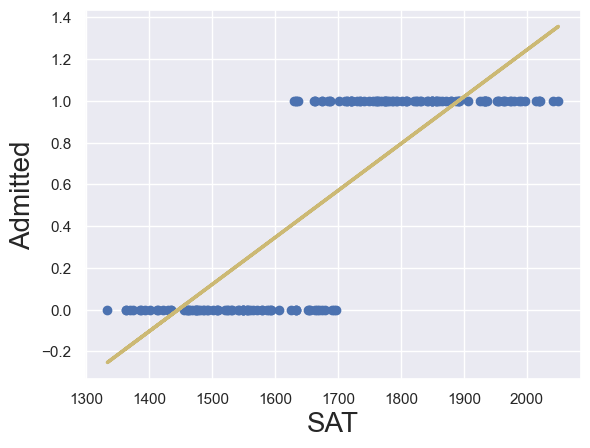

In [8]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color = 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize= 20)
plt.ylabel('Admitted', fontsize =20)
plt.show()

### Plot with a logistic regression curve 

## Regression

In [9]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [11]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.7992
Time:                        02:12:58   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Load the data 

In [12]:
raw_data = pd.read_csv(r"E:\Data Science Material udemy\data of coding\2.02.+Binary+predictors.csv")
raw_data 

SAT Admitted  Gender
0    1363       No    Male
1    1792      Yes  Female
2    1954      Yes  Female
3    1653       No    Male
4    1593       No    Male
..    ...      ...     ...
163  1722      Yes  Female
164  1750      Yes    Male
165  1555       No    Male
166  1524       No    Male
167  1461       No    Male

[168 rows x 3 columns]

In [14]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female':1, 'Male':0})
data

SAT  Admitted  Gender
0    1363         0       0
1    1792         1       1
2    1954         1       1
3    1653         0       0
4    1593         0       0
..    ...       ...     ...
163  1722         1       1
164  1750         1       0
165  1555         0       0
166  1524         0       0
167  1461         0       0

[168 rows x 3 columns]

In [15]:
y = data['Admitted']
x1 = data['Gender']

### Regression 

In [17]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.1659
Time:                        02:59:44   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

## Accuracy 

In [19]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
result_log.predict()

array([0.34, 0.81, 0.81, 0.34, 0.34, 0.81, 0.81, 0.81, 0.81, 0.34, 0.81,
       0.81, 0.81, 0.34, 0.34, 0.81, 0.34, 0.34, 0.81, 0.81, 0.81, 0.34,
       0.81, 0.81, 0.81, 0.34, 0.81, 0.34, 0.81, 0.81, 0.34, 0.81, 0.34,
       0.34, 0.34, 0.34, 0.34, 0.81, 0.34, 0.81, 0.34, 0.81, 0.34, 0.34,
       0.34, 0.34, 0.81, 0.34, 0.34, 0.34, 0.34, 0.34, 0.81, 0.81, 0.81,
       0.34, 0.34, 0.81, 0.34, 0.81, 0.34, 0.34, 0.81, 0.34, 0.34, 0.34,
       0.34, 0.34, 0.81, 0.34, 0.34, 0.34, 0.81, 0.34, 0.34, 0.34, 0.34,
       0.34, 0.81, 0.81, 0.34, 0.81, 0.81, 0.81, 0.81, 0.81, 0.34, 0.34,
       0.81, 0.81, 0.81, 0.81, 0.81, 0.81, 0.34, 0.34, 0.81, 0.81, 0.81,
       0.81, 0.81, 0.34, 0.81, 0.34, 0.81, 0.81, 0.81, 0.81, 0.34, 0.34,
       0.34, 0.34, 0.34, 0.81, 0.34, 0.34, 0.81, 0.34, 0.81, 0.81, 0.81,
       0.34, 0.81, 0.34, 0.81, 0.34, 0.81, 0.34, 0.34, 0.34, 0.81, 0.34,
       0.81, 0.34, 0.34, 0.34, 0.81, 0.34, 0.81, 0.34, 0.34, 0.81, 0.34,
       0.81, 0.81, 0.81, 0.34, 0.34, 0.34, 0.34, 0.

In [20]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [21]:
result_log.pred_table()

array([[59.00, 15.00],
       [31.00, 63.00]])

In [22]:
cm_df = pd.DataFrame(result_log.pred_table())
cm_df.columns = ['predicted 0', 'predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

predicted 0  predicted 1
Actual 0         59.0         15.0
Actual 1         31.0         63.0

### To calculate the accuracy that should i do 

In [23]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train 

0.7261904761904762

## Testing the model and assessing its accuracy 

In [24]:
test = pd.read_csv(r"E:\Data Science Material udemy\data of coding\2.03.+Test+dataset.csv")
test 

SAT Admitted  Gender
0   1323       No    Male
1   1725      Yes  Female
2   1762      Yes  Female
3   1777      Yes    Male
4   1665       No    Male
5   1556      Yes  Female
6   1731      Yes  Female
7   1809      Yes  Female
8   1930      Yes  Female
9   1708      Yes    Male
10  1970      Yes  Female
11  2039      Yes  Female
12  1681      Yes  Female
13  1444       No    Male
14  1726       No    Male
15  1876      Yes  Female
16  1485       No    Male
17  1500       No  Female
18  1900      Yes    Male

In [25]:
test['Admitted'] = test['Admitted'].map({'Yes':1, 'No':0})
test['Gender'] = test['Gender'].map({'Female':1, 'Male':0})
test 

SAT  Admitted  Gender
0   1323         0       0
1   1725         1       1
2   1762         1       1
3   1777         1       0
4   1665         0       0
5   1556         1       1
6   1731         1       1
7   1809         1       1
8   1930         1       1
9   1708         1       0
10  1970         1       1
11  2039         1       1
12  1681         1       1
13  1444         0       0
14  1726         0       0
15  1876         1       1
16  1485         0       0
17  1500         0       1
18  1900         1       0